# 9 수학용 도구

9-1 근사화

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5*x

주어진 구간에서 회귀법과 보간법으로 근사화

In [3]:
x = np.linspace(-2*np.pi,2*np.pi,50) #-2π~2π 까지 총 50개로 균등

Text(0.5, 1.0, 'example function')

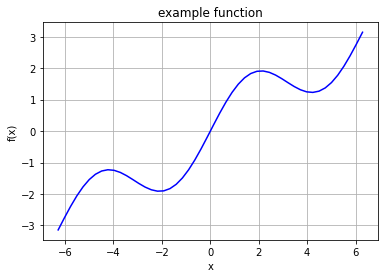

In [4]:
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('example function')

9-1-1 회귀법

In [5]:
#deg=1 <-linear regression
reg = np.polyfit(x,f(x),deg=1)
ry = np.polyval(reg,x)

Text(0, 0.5, 'f(x)')

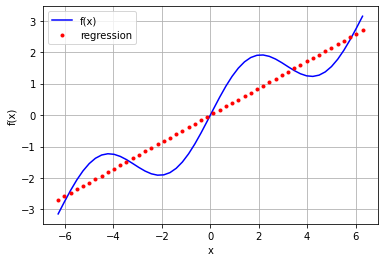

In [6]:
plt.plot(x,f(x),'b',label ='f(x)')
plt.plot(x,ry,'r.',label = 'regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

> No explain sin function by linear regression

In [7]:
#polynomial
reg=np.polyfit(x,f(x),deg=5) #deg <-차수
ry = np.polyval(reg,x)

Text(0, 0.5, 'f(x)')

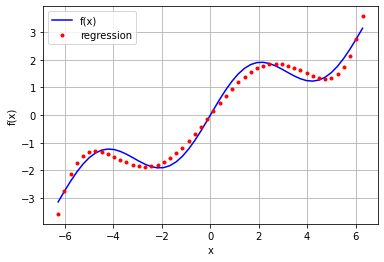

In [8]:
plt.plot(x,f(x),'b',label ='f(x)')
plt.plot(x,ry,'r.',label = 'regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [9]:
reg=np.polyfit(x,f(x),deg=7)
ry = np.polyval(reg,x)

Text(0, 0.5, 'f(x)')

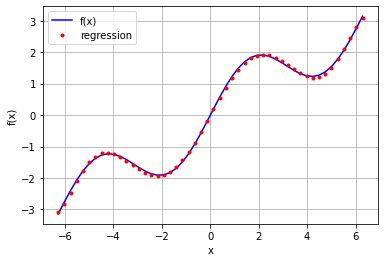

In [10]:
plt.plot(x,f(x),'b',label ='f(x)')
plt.plot(x,ry,'r.',label = 'regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [11]:
np.allclose(f(x),ry) #아주 유사하나 일치하지 않음

False

In [12]:
np.sum((f(x)-ry)**2)/len(x) #MSE는 작음

0.0017769134759517593

In [13]:
#개별기저함수

In [14]:
matrix = np.zeros((3+1,len(x)))
matrix[3,:]=x**3
matrix[2,:]=x**2
matrix[1,:]=x
matrix[0,:]=1

In [15]:
reg = np.linalg.lstsq(matrix.T,f(x))[0]

<ipython-input-15-4994c9ede21b>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg = np.linalg.lstsq(matrix.T,f(x))[0]


In [16]:
reg

array([ 1.50654604e-14,  5.62777448e-01, -1.11022302e-15, -5.43553615e-03])

In [17]:
ry=np.dot(reg,matrix)

Text(0, 0.5, 'f(x)')

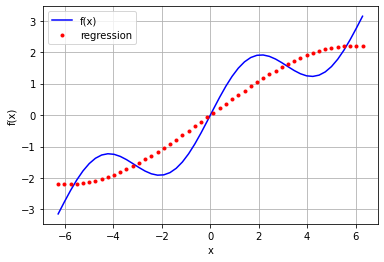

In [18]:
plt.plot(x,f(x),'b',label ='f(x)')
plt.plot(x,ry,'r.',label = 'regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

최소자승법을 이용한 회귀결과

In [19]:
matrix[3,:] = np.sin(x)
reg = np.linalg.lstsq(matrix.T,f(x))[0]
ry = np.dot(reg,matrix)

<ipython-input-19-8a77aa6a8772>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg = np.linalg.lstsq(matrix.T,f(x))[0]


Text(0, 0.5, 'f(x)')

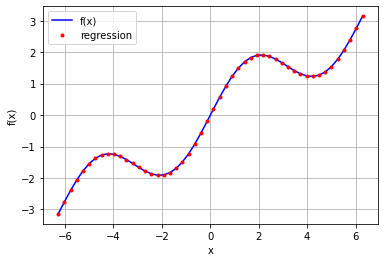

In [20]:
plt.plot(x,f(x),'b',label ='f(x)')
plt.plot(x,ry,'r.',label = 'regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

>개별기저함수사용한 회귀결과

In [21]:
np.allclose(f(x),ry)

True

In [22]:
np.sum((f(x)-ry)**2)/len(x)

3.345571424993955e-31

In [23]:
reg

array([4.2004068e-16, 5.0000000e-01, 0.0000000e+00, 1.0000000e+00])

In [24]:
#noise file

In [25]:
xn = np.linspace(-2*np.pi,2*np.pi,50)
xn = xn+0.15*np.random.standard_normal(len(xn))
yn = f(xn) + 0.25*np.random.standard_normal(len(xn))

In [26]:
reg = np.polyfit(xn,yn,7)
ry = np.polyval(reg,xn)

Text(0, 0.5, 'f(x)')

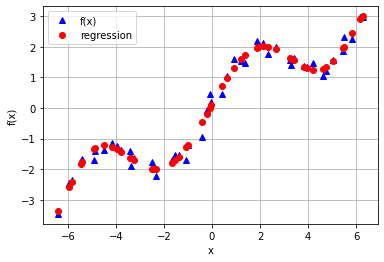

In [27]:
plt.plot(xn,yn,'b^',label ='f(x)')
plt.plot(xn,ry,'ro',label = 'regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

>회귀분석이 어느정도 잡음을 줄여주는 역할을 함

In [28]:
#정렬X자료

In [29]:
xu = np.random.rand(50)*4*np.pi-2*np.pi
yu = f(xu)

In [30]:
print(xu[:10].round(2),yu[:10].round(2))

[-0.48 -3.11  1.46  5.72 -3.74 -5.06  2.47  3.72 -0.63  1.51] [-0.7  -1.59  1.72  2.32 -1.31 -1.59  1.86  1.31 -0.9   1.75]


In [31]:
reg = np.polyfit(xu,yu,5)
ry = np.polyval(reg,xu)

Text(0, 0.5, 'f(x)')

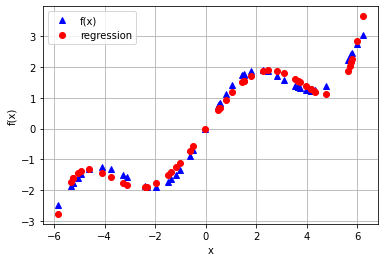

In [34]:
plt.plot(xu,yu,'b^',label ='f(x)')
plt.plot(xu,ry,'ro',label = 'regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

> 즉, 관측점의 순서에 영향 받지 않음.

In [64]:
#다차원자료

In [35]:
def fm(xy):
    x,y = xy
    return np.sin(x)*0.25*x+np.sqrt(y)+0.05*y**2

In [36]:
x = np.linspace(0,10,20)
y = np.linspace(0,10,20)
X, Y = np.meshgrid(x,y) #1차원 배열에서 2차원 그리드 생성
Z = fm((X,Y))
x = X.flatten()
y = Y.flatten()

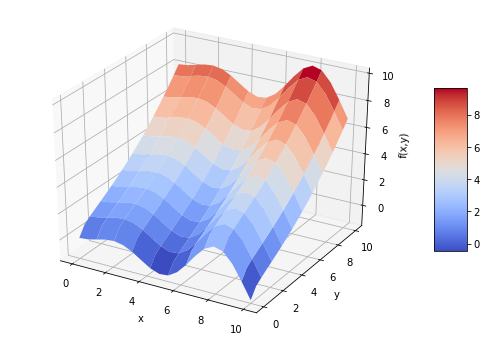

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X,Y,Z,rstride = 2, cstride=2,
                      cmap = mpl.cm.coolwarm,
                      linewidth = 0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink = 0.5, aspect = 5)

In [38]:
matrix = np.zeros((len(x),6+1))
matrix[:,6] = np.sqrt(y)
matrix[:,5] = np.sin(x)
matrix[:,4] = y**2
matrix[:,3] = x**2
matrix[:,2] = y
matrix[:,1] = x
matrix[:,0] = 1

In [39]:
import statsmodels.api as sm

In [40]:
model = sm.OLS(fm((x,y)),matrix).fit()  #OLS 최소자승회귀계산함수

In [41]:
model.rsquared

0.980071710227061

In [42]:
a = model.params
a

array([-8.18005102e-01,  2.93142035e-01, -1.41553436e-15, -2.08258465e-02,
        5.00000000e-02,  1.35102823e+00,  1.00000000e+00])

In [43]:
#최적회긔계수와 독립변수좌표 주면 회귀함수값 계산 함수
def reg_func(a,xy):
    x,y = xy
    f6 = a[6]*np.sqrt(y)
    f5 = a[5]*np.sin(x)
    f4 = a[4]*y**2
    f3 = a[3]*x**2
    f2 = a[2]*y
    f1 = a[1]*x
    f0 = a[0]*1
    return(f6+f5+f4+f3+f2+f1+f0)

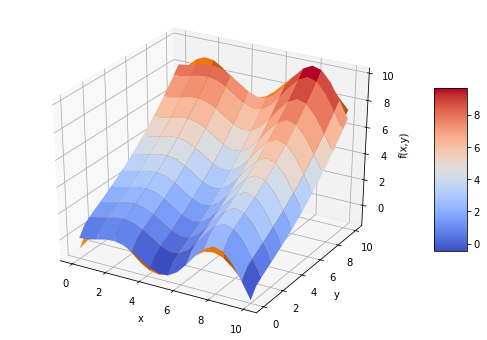

In [44]:
RZ = reg_func(a,(X,Y))
fig = plt.figure(figsize = (9,6))
ax = fig.gca(projection = '3d')
surf1 = ax.plot_surface(X,Y,Z,rstride = 2, cstride=2,
                      cmap = mpl.cm.coolwarm,
                      linewidth = 0.5,antialiased=True)
surf2 = ax.plot_surface(X,Y,RZ,rstride = 2, cstride = 2,
                       label = 'regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink = 0.5, aspect = 5)

9-1-2 보간법

In [45]:
import scipy.interpolate as spi

In [46]:
x = np.linspace(-2*np.pi,2*np.pi,25)

In [47]:
def f(x):
    return np.sin(x)+0.5*x

In [89]:
#회귀와 유사하나 splrep,splev 함수 사용

In [48]:
ipo = spi.splrep(x,f(x),k=1) #k <- 스플라인 함수의 차수
iy = spi.splev(x,ipo)

Text(0, 0.5, 'y')

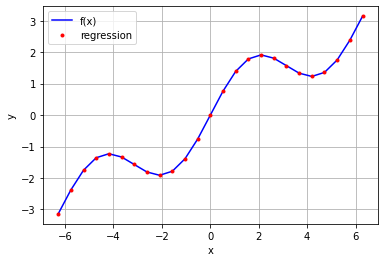

In [49]:
plt.plot(x,f(x),'b',label = 'f(x)')
plt.plot(x,iy,'r.',label ='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [50]:
#1차 스플라인 보간법만 해도 괜찮
np.allclose(f(x),iy) #수치적으로 비교

True

In [51]:
#더 작은 구간
xd = np.linspace(1.0,3.0,50)
iyd = spi.splev(xd,ipo)

Text(0, 0.5, 'y')

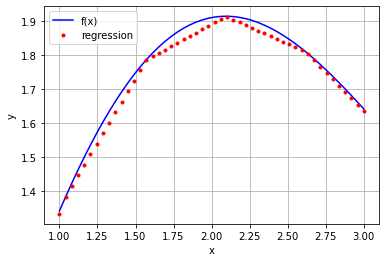

In [52]:
plt.plot(xd,f(xd),'b',label = 'f(x)')
plt.plot(xd,iyd,'r.',label ='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [53]:
#연속미분 아님!!!! 따라서 정확도 부족할 수 있음

In [54]:
#3차 큐빅 스플라인 사용
ipo = spi.splrep(x,f(x),k=3)
iyd = spi.splev(xd,ipo)

Text(0, 0.5, 'y')

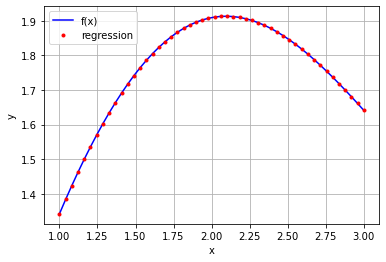

In [55]:
plt.plot(xd,f(xd),'b',label = 'f(x)')
plt.plot(xd,iyd,'r.',label ='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

In [59]:
#수치적으로는 완벽 X, 하지만 오차는 아주 작음
np.allclose(f(xd),iyd) , np.sum((f(xd)-iyd)**2)/len(xd)

(False, 1.1349319851436252e-08)

### 9-2 최적화

결국 최적화 > convex function : Find Min, concave function : Find Max

In [60]:
def fm(xy) :
    x,y = xy
    return np.sin(x)+0.05*x**2 + np.sin(y)+0.05*y**2

In [61]:
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)
X,Y = np.meshgrid(x,y)
Z = fm((X,Y))

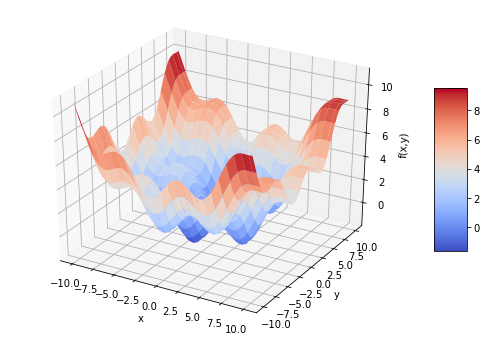

In [62]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(X,Y,Z, rstride = 2, cstride = 2,
                      cmap = mpl.cm.coolwarm, linewidth = 0.5, antialiased = True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink = 0.5, aspect = 5)

전역최소화와 국소 최소화방법 구현 \
전역 최적화 기법 : 다소 시간이 걸리더라도 전체 탐색영역에서 가장 좋은 해를 찾는 것을 목표 \
국소 최적화 기법 : 단시간에 일부 탐색영역 내에서 가장 좋은 해를 찾는 것을 목표

In [63]:
import scipy.optimize as spo

9-2-1 전역 최적화

In [64]:
def fo(xy):
    x,y = xy
    z = np.sin(x)+0.05*x**2+np.sin(y) + 0.05*y**2
    if output == True :
        print( '%8.4f, %8.4f, %8.4f' %(x,y,z))
    return z
# 인수값과 함수값 출력

In [65]:
output = True
spo.brute(fo,((-10,10.1,5),(-10,10.1,5)), finish = None)

-10.0000, -10.0000,  11.0880
-10.0000,  -5.0000,   7.7529
-10.0000,   0.0000,   5.5440
-10.0000,   5.0000,   5.8351
-10.0000,  10.0000,  10.0000
 -5.0000, -10.0000,   7.7529
 -5.0000,  -5.0000,   4.4178
 -5.0000,   0.0000,   2.2089
 -5.0000,   5.0000,   2.5000
 -5.0000,  10.0000,   6.6649
  0.0000, -10.0000,   5.5440
  0.0000,  -5.0000,   2.2089
  0.0000,   0.0000,   0.0000
  0.0000,   5.0000,   0.2911
  0.0000,  10.0000,   4.4560
  5.0000, -10.0000,   5.8351
  5.0000,  -5.0000,   2.5000
  5.0000,   0.0000,   0.2911
  5.0000,   5.0000,   0.5822
  5.0000,  10.0000,   4.7471
 10.0000, -10.0000,  10.0000
 10.0000,  -5.0000,   6.6649
 10.0000,   0.0000,   4.4560
 10.0000,   5.0000,   4.7471
 10.0000,  10.0000,   8.9120


array([0., 0.])

In [66]:
output = False
opt1 = spo.brute(fo,((-10,10.1,0.1),(-10,10.1,0.1)), finish = None)
opt1 #즉 최적화 인수 해 알려줌

array([-1.4, -1.4])

In [67]:
fm(opt1)

-1.7748994599769203

9-2-2 국소최적화

In [68]:
output = True
opt2 = spo.fmin(fo,opt1,xtol=0.001,ftol =0.001, maxiter = 15, maxfun = 20) #위의 전역 최적화 기반으로 국소 최적화 진행한 것
opt2

 -1.4000,  -1.4000,  -1.7749
 -1.4700,  -1.4000,  -1.7743
 -1.4000,  -1.4700,  -1.7743
 -1.3300,  -1.4700,  -1.7696
 -1.4350,  -1.4175,  -1.7756
 -1.4350,  -1.3475,  -1.7722
 -1.4088,  -1.4394,  -1.7755
 -1.4438,  -1.4569,  -1.7751
 -1.4328,  -1.4427,  -1.7756
 -1.4591,  -1.4208,  -1.7752
 -1.4213,  -1.4347,  -1.7757
 -1.4235,  -1.4096,  -1.7755
 -1.4305,  -1.4344,  -1.7757
 -1.4168,  -1.4516,  -1.7753
 -1.4305,  -1.4260,  -1.7757
 -1.4396,  -1.4257,  -1.7756
 -1.4259,  -1.4325,  -1.7757
 -1.4259,  -1.4241,  -1.7757
 -1.4304,  -1.4177,  -1.7757
 -1.4270,  -1.4288,  -1.7757


array([-1.42702972, -1.42876755])

In [69]:
fm(opt2) #좀 더 정확하고 작아짐

-1.7757246992239009

In [70]:
#국소전에 전역 먼저 할것을 권장!! 왜냐하면 한곳에 빠지면 다른곳 못찾음..
output = False
spo.fmin(fo,(2.0,2.0),maxiter = 250) #x=y=2로하는 경우 찾아낸 최솟값

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

9-2-3 제약조건 있는 최적화

In [145]:
#제약조건 등식 혹은 부등식으로 주어짐
#기대효용최대화 문제를 최소화 문제로 만들음

In [83]:
#최소화 함수
from math import sqrt
def Eu(sb):
    s,b = sb
    return -(0.5*sqrt(s*15+b*5) + 0.5*sqrt(s*5+b*12))

#제약 조건
cons = ({'type': 'ineq','fun': lambda sb : 100-sb[0]*10-sb[1]*10})

#예산 제한
bnds = ((0,1000),(0,1000))  #충분히 큼

In [84]:
result = spo.minimize(Eu,[5,5],method = 'SLSQP',
                     bounds = bnds, constraints = cons)

In [85]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [86]:
result['x']   #예산에 따르면 a 8주 b 2주 구입해야 함

array([8.02547122, 1.97452878])

In [87]:
#최적함수 값 (최대효용이므로 ,구한것은 부등호 변환한거기 때문!!)
-result['fun']

9.700883611487832

In [88]:
np.dot(result['x'],[10,10])  #내적하면 주식 가격 알수 ㅇ있 수식 9-3참고(제약조건 때문)

99.99999999999999

## 9-3 정적분

In [5]:
import scipy.integrate as sci

In [6]:
def f(x):
    return np.sin(x) + 0.5*x

In [9]:
a = 0.5
b = 9.5
x = np.linspace(0,10)
y = f(x)